In [1]:
!pip install yargy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 52.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=51a0cef6e425bad57e95cec6a24eba36e4ae96fd9b30f353171bdb3e68eb3687
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/NLP/task1/news.txt'

In [40]:
from yargy import Parser, rule, and_, or_
from yargy.pipelines import morph_pipeline
from yargy.interpretation import fact
from yargy.relations import gnc_relation
from yargy.predicates import gram, is_capitalized, dictionary, gte, lte, caseless, normalized, dictionary


Entry = fact(
    "Entry",
    ["person", "birth_place", "birth_date"]
)

Person = fact(
    "Person",
    ["first", "last"]
)

GRAD_VERB = morph_pipeline([
    "родился в",
    "появился на свет в",
    "в"
])

TOWN_TAG = morph_pipeline([
    "появился на свет в"
    "в селе",
    "в деревне",
    "в городе",
    "родился в",#
    "в поселоке"
    "в"
])


MONTHS = {
    'январь',
    'февраль',
    'март',
    'апрель',
    'мая',
    'июнь',
    'июль',
    'август',
    'сентябрь',
    'октябрь',
    'ноябрь',
    'декабрь'
}

MONTH_NAME = dictionary(MONTHS)

YEAR_WORDS = or_(
    rule(caseless('г'), '.'),
    rule(normalized('год'))
)

DAY = and_(
    gte(1),
    lte(31)
)
MONTH = and_(
    gte(1),
    lte(12)
)
YEAR = and_(
    gte(1),
    lte(2024)
)

DATE = or_(
    rule(
        DAY,
        '.',
        MONTH,
        '.',
        YEAR
    ),
    rule(
        DAY.optional(),
        MONTH_NAME.optional(),
        YEAR,
        YEAR_WORDS.optional()
    )
).interpretation(Entry.birth_date)

BIRTH_PLACE = rule(
    #TOWN_TAG,
    gram("NOUN").optional().repeatable(),
    and_(
        is_capitalized(),
        gram("NOUN")
    )
).interpretation(Entry.birth_place)

gnc = gnc_relation()

NAME = rule(
    is_capitalized().match(gnc).interpretation(Person.first.inflected()),
    is_capitalized().match(gnc).interpretation(Person.last.inflected()).optional(),
).interpretation(Person)


In [41]:
Type1 = rule(
      NAME.interpretation(Entry.person),
      TOWN_TAG,
      BIRTH_PLACE.interpretation(Entry.birth_place),
      GRAD_VERB,
      DATE.interpretation(Entry.birth_date)
      )

Type2 = rule(
    NAME.interpretation(Entry.person),
    GRAD_VERB,
    DATE.interpretation(Entry.birth_date),
    TOWN_TAG,
    BIRTH_PLACE.interpretation(Entry.birth_place)
)

S = rule(
  or_(Type1,
      Type2
    )
).interpretation(Entry)

Entry(person=Person(first='ваня', last=None), birth_place='городе Самара', birth_date='1 марта 1990 года')
['Ваня', 'родился', 'в', 'городе', 'Самара', 'в', '1', 'марта', '1990', 'года']


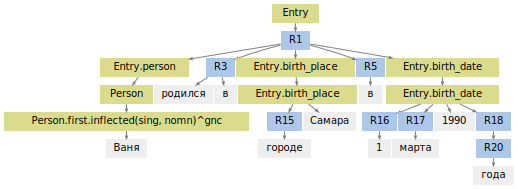

In [45]:
text="Ваня родился в городе Самара в 1 марта 1990 года"

parser = Parser(S)
for match in parser.findall(text):
    print(match.fact)
    print([_.value for _ in match.tokens])
    display(match.tree.as_dot)

In [50]:
from dataclasses import dataclass
from typing import Iterator, Optional

@dataclass
class Entry:
    name: str
    birth_date: Optional[str]
    birth_date: Optional[str]

def read_texts(fn: str):
    texts=[]
    with open(fn, "rt", encoding="utf-8") as f:
        for line in f:
            texts.append(line.strip().split("\t")[2])
    return texts


In [54]:
texts = list(read_texts(path))

In [56]:
from tqdm import tqdm

for text in tqdm(texts, disable=True):
    try:
        for match in parser.findall(text):
         print(match.fact)
    except:
       # empty
       pass

Entry(person=Person(first='яковлевюрий', last='яковлев'), birth_place='Москве', birth_date='1928 году')
Entry(person=Person(first='патрик', last=None), birth_place='Бронксе', birth_date='1990 году')
Entry(person=Person(first='инна', last='лиснянская'), birth_place='Баку', birth_date='1928 году')
Entry(person=Person(first='колин', last='дэвис'), birth_place='графстве Суррей', birth_date='1927 году')
Entry(person=Person(first='гамильтон', last=None), birth_place='Лондоне', birth_date='1922 году')
Entry(person=Person(first='юлия', last='пастрана'), birth_place='Мексике', birth_date='1834 году')
Entry(person=Person(first='рахлина', last=None), birth_place='Ленинграде', birth_date='1938 году')
Entry(person=Person(first='владимир', last='высоцкий'), birth_place='Москве', birth_date='1938 году')
Entry(person=Person(first='монро', last=None), birth_place='Ленинграде', birth_date='1969 году')
Entry(person=Person(first='игорь', last='кваша'), birth_place='Москве', birth_date='1933 году')
Entry(p